# Word Prediction using Recurrent Neural Networks (RNNs)
## Experiment 2016-12-23

Loop over training size, plot learning curves. 

### Table of Contents

1. Prepare Data
2. Explore Data
3. Analyze Models
4. Generate Text

## Imports

In [354]:
# import python modules
from __future__ import print_function, division
import os.path
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import tokenize

In [355]:
# import wp modules (can be slow)
import sys; sys.path.append('../../src')
print('importing wp (and nltk)...')
import wp
print('done')

importing wp (and nltk)...
done


In [356]:
# reload wp modules in case changed (for development purposes)
reload(wp)
reload(wp.data)
reload(wp.util)
reload(wp.model)
reload(wp.ngram)
reload(wp.rnn)
reload(wp.analyze)

<module 'wp.analyze' from '../../src\wp\analyze.pyc'>

## Initialize

In [357]:
random.seed(0)

#nvocab = 100

## 1. Prepare Data

Merge raw text files, convert to plain strings, split into train, validate, and test sets.

In [358]:
# get wrapper around all data and tokenization
data = wp.data.Data()

Merge the raw data files into one and remove non-ascii characters (nltk complains otherwise).

In [359]:
data.merge()

The raw files have already been merged.


Split the merged file by sentences into train, validate, and test sets.

In [360]:
data.split()

The merged file has already been split.


Find most used vocabulary words to keep RNN from getting too expensive.

In [361]:
#data.find_vocabulary(nvocab)

## 2. Explore Data

### Show some samples of the text

In [362]:
s_merged = data.text('merged')
nsamples = 4
nchars = len(s_merged)
nskip = int(nchars / nsamples)
for i in range(nsamples):
    s = s_merged[i*nskip:i*nskip+200]
    s = s.replace('\n', ' ').strip()
    print(s)
    print()

The Project Gutenberg EBook of Les Misrables, by Victor Hugo  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-us

ng his loss of sleep by an hour at the swimming-school, he mounted rapidly to his chamber, took merely time enough to throw off his travelling-coat, and the black ribbon which he wore round his neck,

than Javert. Javert, after his unlooked-for escape from the barricade, had betaken himself to the prefecture of police, had rendered a verbal account to the Prefect in person in a brief audience, had

hire, where, some six months before, he had been left an orphan. Now, owing to the generous offer of his elderly cousin, Mr Abney, he had come to live at Aswarby. The offer was unexpected, because all



### Show some text split into sentences

This shows how the text was split up into the train, validate, and test sets.

In [363]:
# we'll just look at the first 50k characters, because parsing sentences is slow
sentences = data.sentences('merged', 50000)
random.seed(0)
samples = random.sample(sentences, 5)
print('\n\n'.join(samples))

To villages where he found no schoolmaster, he quoted once more the people of Queyras: "Do you know how they manage?"

Those who had and those who lacked knocked at M. Myriel's door,--the latter in search of the alms which the former came to deposit.

.

.

.


### Show the text split into tokens

Note that punctuation marks are treated as separate tokens.

In [364]:
tokens = data.tokens('merged', 50000)
print('ntokens',len(tokens))
print(tokens[-50:])

ntokens 10556
['he', 'saw', 'everyone', 'exclaiming', 'very', 'loudly', ',', 'and', 'growing', 'angry', 'very', 'quickly', ',', '``', 'Oh', '!', 'END', 'oh', '!', "''", 'END', 'he', 'said', ',', 'with', 'a', 'smile', ';', '``', 'to', 'all', 'appearance', ',', 'this', 'is', 'a', 'great', 'crime', 'which', 'all', 'the', 'world', 'commits', '.', 'END', 'These', 'are', 'hypocrisies', 'w', 'END']


## 3. Analyze Models

Train models on the training tokens and test them on the test tokens.

In [365]:
# define models to test
modelspecs = [
    [wp.ngram.NgramModel, {'n':1}],
    [wp.ngram.NgramModel, {'n':2}],
    [wp.ngram.NgramModel, {'n':3}],
    [wp.ngram.NgramModel, {'n':4}],
    [wp.rnn.RnnModel, {'nvocab':1000,'nhidden':10}],
]

In [366]:
# train models on different amounts of training data
modelfolder = '../../data/models'
nchars_list = (1000,10000,100000)#,1000000)#,6000000)
for nchars in nchars_list:
    print('ntraining_chars', nchars)
    # load/train/save model
    models = wp.analyze.init_models(modelspecs, modelfolder, data, nchars) # load/train models

ntraining_chars 1000
load model ../../data/models/NgramModel-(nchars-1000-n-1).pickle
load model ../../data/models/NgramModel-(nchars-1000-n-2).pickle
load model ../../data/models/NgramModel-(nchars-1000-n-3).pickle
load model ../../data/models/NgramModel-(nchars-1000-n-4).pickle
load model ../../data/models/RnnModel-(nchars-1000-nvocab-1000-nhidden-10).pickle
ntraining_chars 10000
load model ../../data/models/NgramModel-(nchars-10000-n-1).pickle
load model ../../data/models/NgramModel-(nchars-10000-n-2).pickle
load model ../../data/models/NgramModel-(nchars-10000-n-3).pickle
load model ../../data/models/NgramModel-(nchars-10000-n-4).pickle
load model ../../data/models/RnnModel-(nchars-10000-nvocab-1000-nhidden-10).pickle
ntraining_chars 100000
load model ../../data/models/NgramModel-(nchars-100000-n-1).pickle
load model ../../data/models/NgramModel-(nchars-100000-n-2).pickle
load model ../../data/models/NgramModel-(nchars-100000-n-3).pickle
load model ../../data/models/NgramModel-(nch

In [367]:
# test models and save results to a table
rows = []
npredictions_max = 1000
k = 3 # predict top k tokens
for nchars in nchars_list:
    print('nchars',nchars)
    results = wp.analyze.test_models(models, data, npredictions_max, k, nchars) # test models
    print()
    row = [nchars] + results
    rows.append(row)

nchars 1000
get complete stream of test tokens, nchars=1000
n-gram (n=1): accuracy = nright/total = 5/183 = 0.027322
n-gram (n=2): accuracy = nright/total = 4/182 = 0.021978
n-gram (n=3): accuracy = nright/total = 1/181 = 0.005525
n-gram (n=4): accuracy = nright/total = 0/180 = 0.000000
rnn: accuracy = nright/total = 0/179 = 0.000000

nchars 10000
get complete stream of test tokens, nchars=10000
n-gram (n=1): accuracy = nright/total = 92/1001 = 0.091908
n-gram (n=2): accuracy = nright/total = 31/1001 = 0.030969
n-gram (n=3): accuracy = nright/total = 8/1001 = 0.007992
n-gram (n=4): accuracy = nright/total = 1/1001 = 0.000999
rnn: accuracy = nright/total = 11/1001 = 0.010989

nchars 100000
get complete stream of test tokens, nchars=100000
n-gram (n=1): accuracy = nright/total = 92/1001 = 0.091908
n-gram (n=2): accuracy = nright/total = 31/1001 = 0.030969
n-gram (n=3): accuracy = nright/total = 8/1001 = 0.007992
n-gram (n=4): accuracy = nright/total = 1/1001 = 0.000999
rnn: accuracy = nr

In [368]:
cols = ['nchars'] + [model.name for model in models]
df = pd.DataFrame(rows, columns=cols)
df

,nchars,n-gram (n=1),n-gram (n=2),n-gram (n=3),n-gram (n=4),rnn
0,1000,0.027322,0.021978,0.005525,0.000000,0.000000
1,10000,0.091908,0.030969,0.007992,0.000999,0.010989
2,100000,0.091908,0.030969,0.007992,0.000999,0.010989


In [369]:
dft = df.transpose()
dft.columns = nchars_list
dft2 = dft.drop('nchars',axis=0)
dft2

,1000,10000,100000
n-gram (n=1),0.027322,0.091908,0.091908
n-gram (n=2),0.021978,0.030969,0.030969
n-gram (n=3),0.005525,0.007992,0.007992
n-gram (n=4),0.000000,0.000999,0.000999
rnn,0.000000,0.010989,0.010989


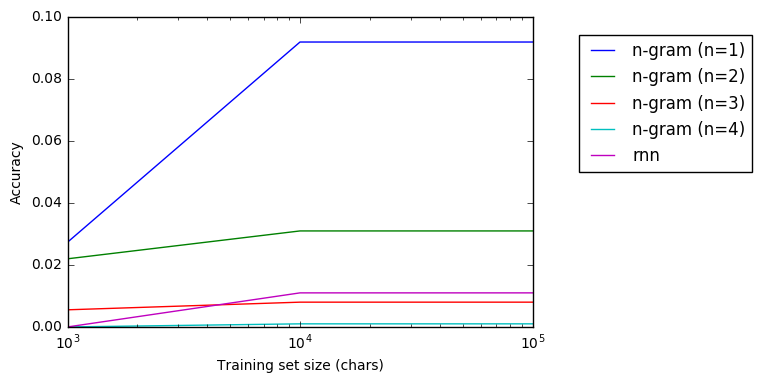

In [372]:
plt.plot(dft2.columns, dft2.ix[0])
plt.plot(dft2.columns, dft2.ix[1])
plt.plot(dft2.columns, dft2.ix[2])
plt.plot(dft2.columns, dft2.ix[3])
plt.plot(dft2.columns, dft2.ix[4])
#plt.legend(loc='best')
plt.legend(loc=(1.1,0.5))
plt.xscale('log')
plt.xlabel('Training set size (chars)')
plt.ylabel('Accuracy')
plt.show()

## 4. Generate Text

In [371]:
nsentences = 5
for model in models:
    print(model.name)
    for seed in range(nsentences):
        random.seed(seed)
        tokens = model.generate()
        if tokens:
            s = ' '.join(tokens)
            print(s)
            print()
    print()

n-gram (n=1)
CHAPTER be END

They out by has I and door accuse , me CHAPTER that by under and him the . etc Linnus must of . END

. . , , CHAPTER SATISFIED a time to to hospitals been that END

the of END

the , END


n-gram (n=2)
Carrier is another wolf . END

For the innocent , nevertheless , and sick and four unfortunate gendarmes were set to any one of a paper , and the treasurer of renunciation and set to whom his arrival , Poinot , 1833 CHAPTER VI -- THE CONJUNCTION OF SERVICE FROM THE SEWER AND NICOLETTE CHAPTER IV -- fifteen hundred francs , and forty-six thousand francs , because he was afraid ? END

As he had discovered these thousand francs each other without , naked to notice it my carriage in with absolute submission by him , `` I shall see of all , common enough to it happen that valley , which were a schoolboy . '' pursued , as that I do you Wisdom and eighty-five auxiliary chapels . END

He was expecting that he had already been extracted from the Bishop meditated on th